In [1]:
# import library 
import pandas as pd 
import matplotlib.pyplot as plt 
from myst_nb import glue

# display plot in the notebook 
%matplotlib inline 

# set figuresize and fontsize 
plt.rcParams['figure.figsize'] = (8,6) 
plt.rcParams['font.size'] = 14 

ModuleNotFoundError: No module named 'pandas'

In [27]:
data_cols = ["Number","Recommendation","Audit Question","Weight","Level","Description","Grade"]
datas = pd.read_csv("data/manufactoring_on_board.csv", header=0, names=data_cols, na_filter=False)

In [28]:
glue("data_desciption",datas.head())

,Number,Recommendation,Audit Question,Weight,Level,Description,Grade
0,7,Procedures related to corrective actions inclu...,What process is used to collect technical even...,15.4,4,Procedures related to corrective actions inclu...,46.2
1,8,Procedures related to preventive actions inclu...,Do procedures related to preventive actions in...,15.6,4,Procedures for preventive actions do exist. th...,46.8
2,17,The subassembly varnishing activity. that must...,Are inspection parameters monitored during the...,9.9,2,The varnishing activity is monitored by superv...,9.9
3,18,Maintenance procedures related to corrective a...,Does corrective maintenance take place as soon...,6.9,2,Corrective actions are made directly where the...,6.9
4,19,Based on the defined preventive maintenance pl...,Is preventive maintenance planned to correct d...,4.0,3,Real maintenance procedures are implemented fo...,8.0


In [29]:
glue("data_stats",datas.describe())

,Number,Weight,Level,Grade
count,53.000000,53.000000,53.000000,53.000000
mean,87.867925,6.769811,2.150943,9.035849
std,44.831324,3.662312,0.948607,11.463791
min,7.000000,2.800000,1.000000,0.000000
25%,43.000000,5.200000,1.000000,0.000000
50%,95.000000,5.900000,2.000000,6.600000
75%,126.000000,6.700000,3.000000,12.000000
max,155.000000,26.000000,4.000000,52.000000


In [30]:
count_levels = datas.groupby(['Level']).count()
print(count_levels)

       Number  Recommendation  Audit Question  Weight  Description  Grade
Level                                                                    
1          17              17              17      17           17     17
2          14              14              14      14           14     14
3          19              19              19      19           19     19
4           3               3               3       3            3      3


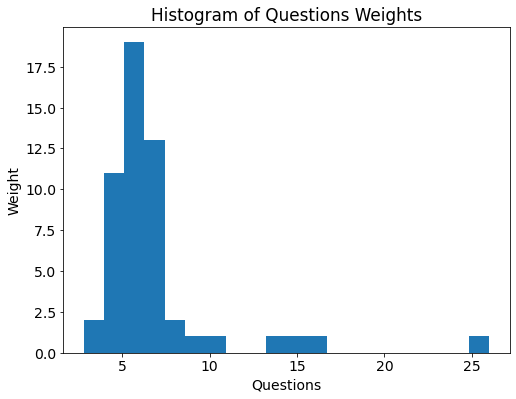

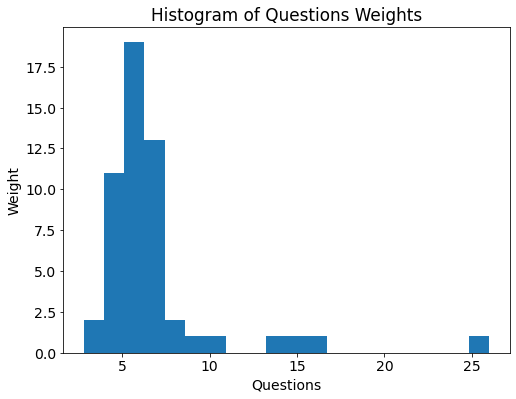

In [31]:
fig1 = datas.Weight.plot(kind="hist", bins=20, title="Histogram of Questions Weights")
plt.xlabel("Questions") 
plt.ylabel("Weight")
#plt.savefig("plots/plot_weight_hist")
glue("plot_weight_hist", fig1.get_figure(), display=False)

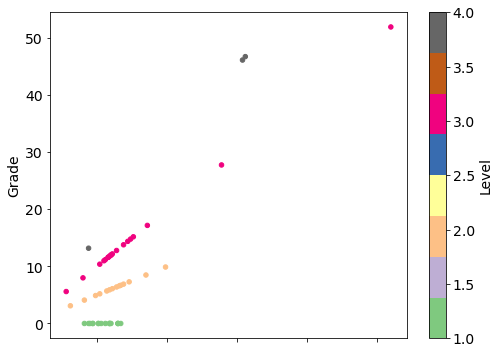

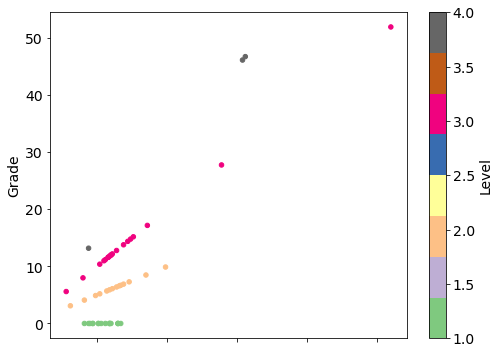

In [32]:

cmap = {1: 'red', 2: 'blue', 3: 'yellow', 4 : 'green'}
fig2 = datas.plot(kind="scatter", x="Weight", y="Grade", c="Level", colormap="Accent"); 
#plt.savefig("plots/fig_scatter_grade")
glue("fig_scatter_grade", fig2.get_figure(), display=False)

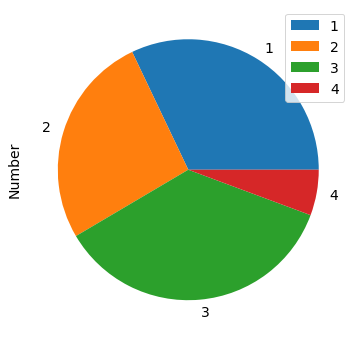

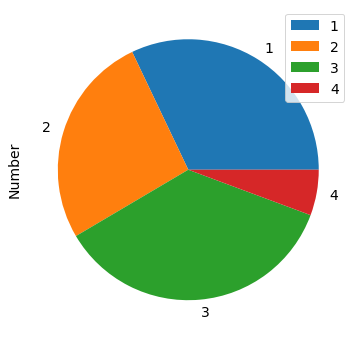

In [33]:
count_level = datas.groupby(['Level']).count()
fig3 = count_level.plot.pie(y="Number")
fig3.get_figure().savefig("plots/fig_level_pie")
glue("fig_level_pie",fig3.get_figure() , display=False)

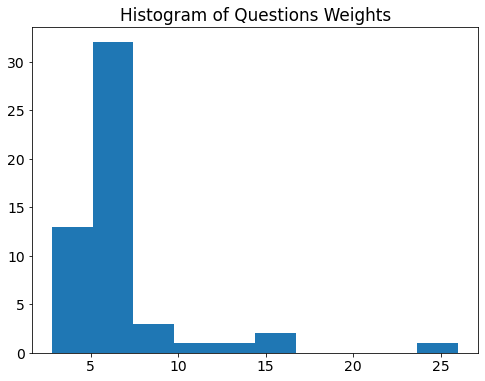

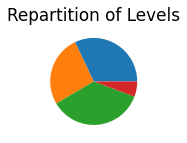

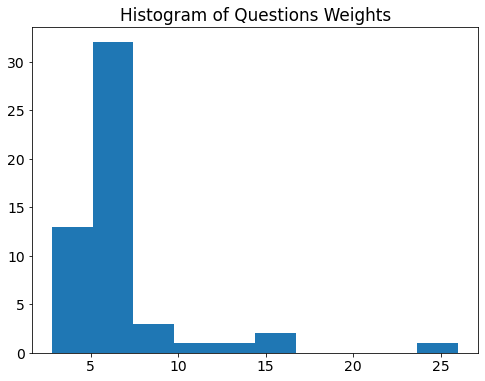

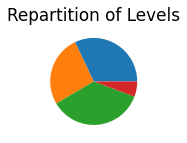

In [34]:
fig, ax = plt.subplots()
ax.hist(datas.Weight)
ax.set_title("Histogram of Questions Weights")

fig2, ax = plt.subplots(figsize=(6, 2))
ax.pie(count_level['Number'])
ax.set_title("Repartition of Levels")

glue("hist_weights", fig, display=False)
glue("pie_levels", fig2, display=False)

In [42]:
import plotly.express as px

figX = px.scatter(datas, x="Weight", y="Grade", color="Level")
figX
glue("plotly_scattered", figX.get_subplot(), display=False)

In [41]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()